In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Description:

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression


## Predictor Variables:
* Hours Studied: The total number of hours spent studying by each student.
* Previous Scores: The scores obtained by students in previous tests.
* Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
* Sleep Hours: The average number of hours of sleep the student had per day.
* Sample Question Papers Practiced: The number of sample question papers the student practiced.

## Target/Response Variable:

* Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

In [11]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [19]:
for col in df.columns:
    df.rename({col : col.replace(' ', '_').lower()}, axis=1, inplace=True)

In [21]:
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [23]:
df['extra_activities_binary'] = df['extracurricular_activities'].map({'Yes' : 1, 'No' : 0})

In [25]:
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index,extra_activities_binary
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


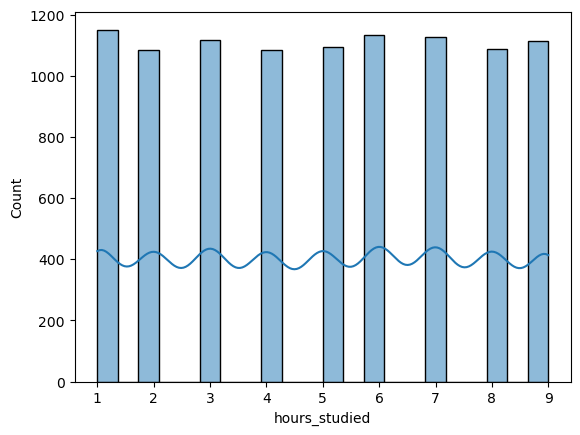

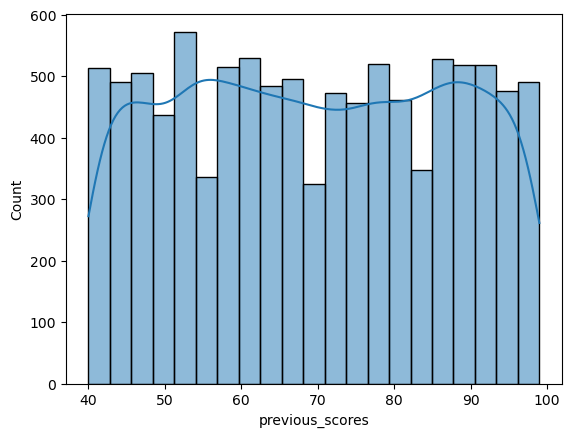

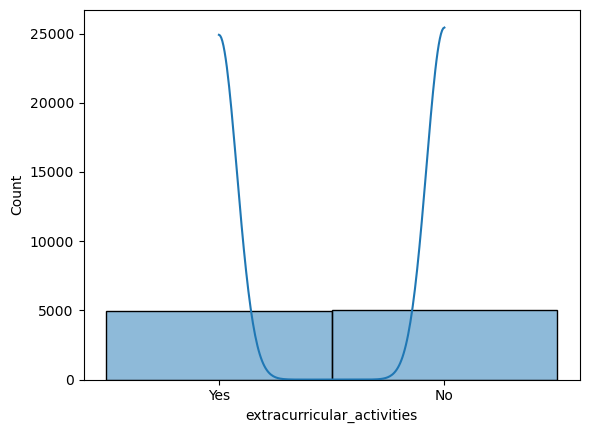

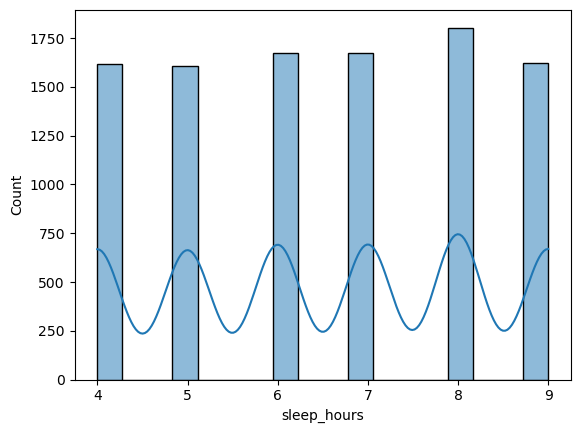

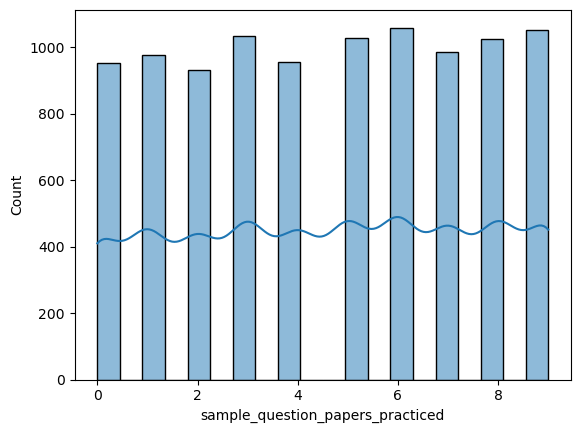

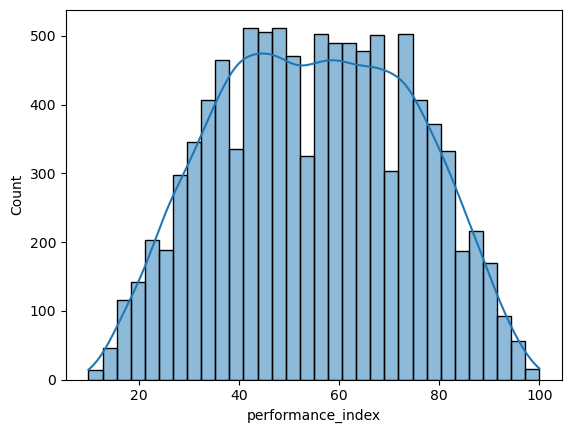

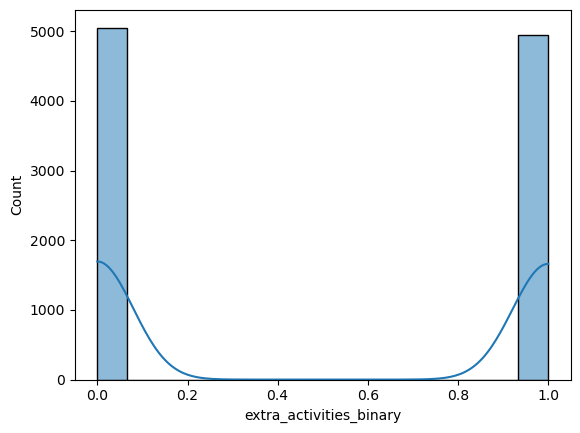

In [31]:
for col in df.columns:
    sns.histplot(data=df[col], kde=True)
    plt.show()

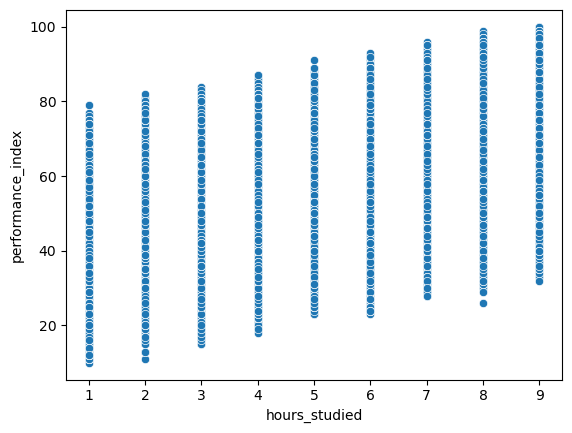

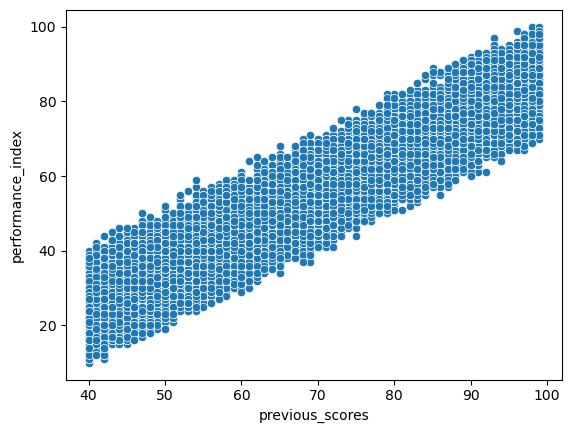

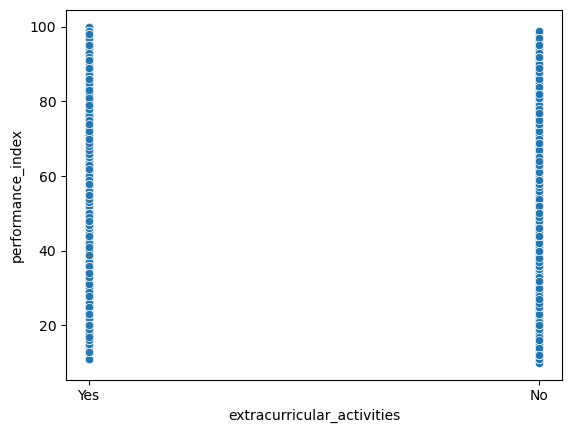

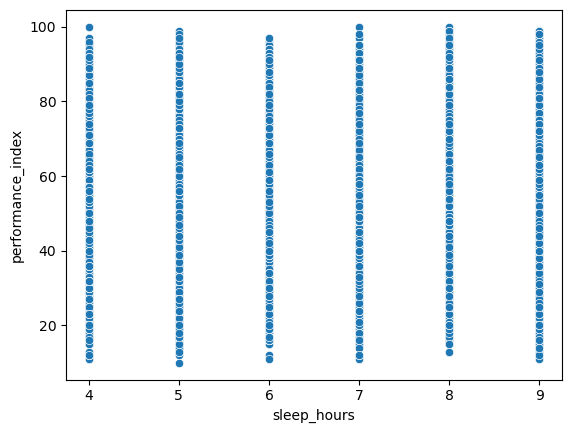

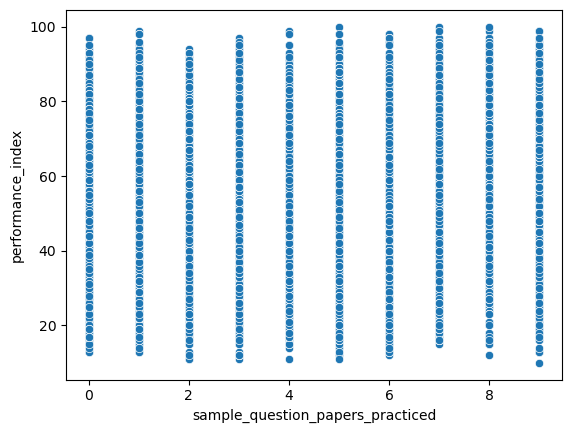

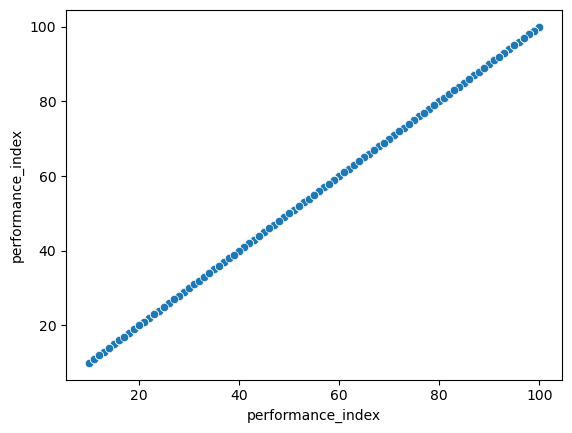

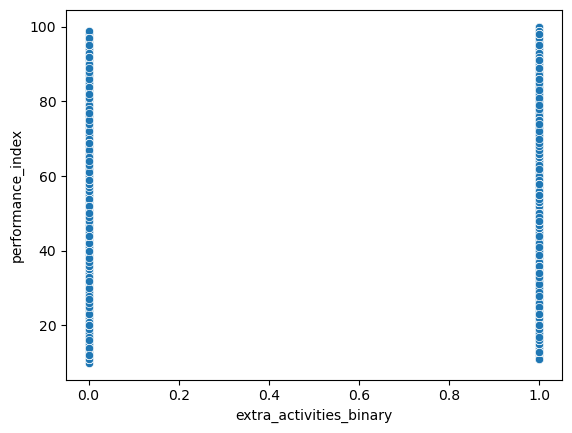

In [33]:
for col in df.columns:
    sns.scatterplot(data=df, x=col, y='performance_index')
    plt.show()

In [37]:
df.isnull().sum()

hours_studied                       0
previous_scores                     0
extracurricular_activities          0
sleep_hours                         0
sample_question_papers_practiced    0
performance_index                   0
extra_activities_binary             0
dtype: int64

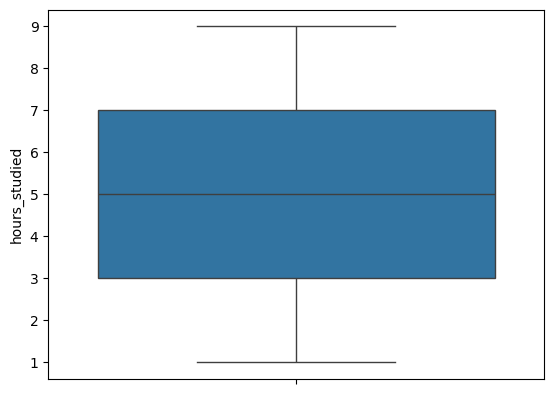

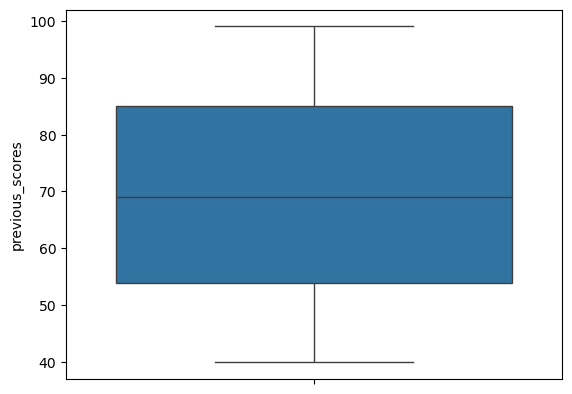

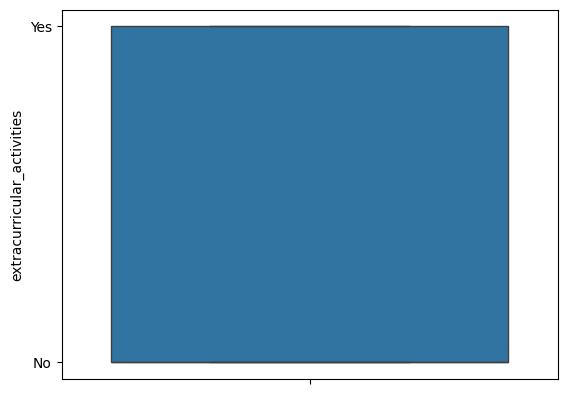

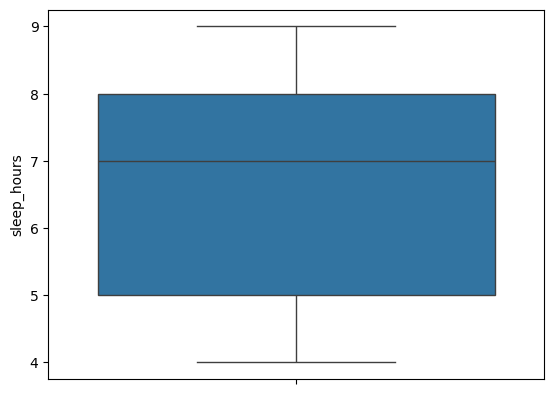

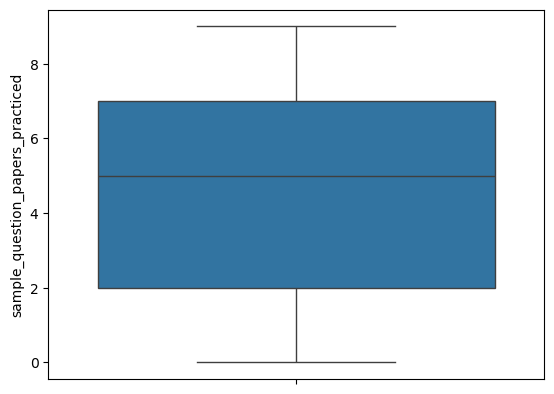

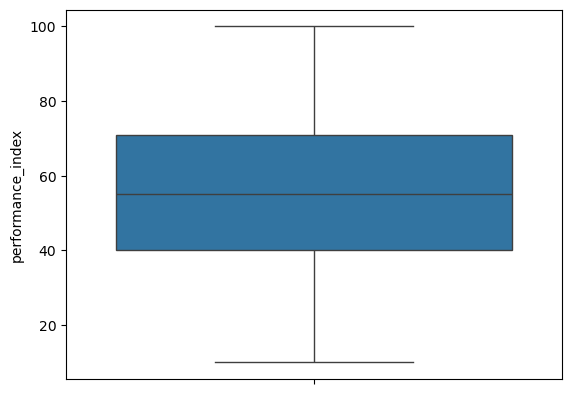

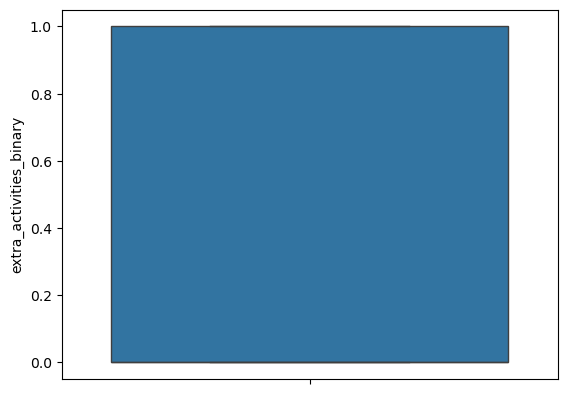

In [39]:
for col in df.columns:
    sns.boxplot(data=df[col])
    plt.show()

## Identify predictors and response variables

In [44]:
X = df[['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question_papers_practiced', 'extra_activities_binary']].values
y = df['performance_index'].values

## Split into testing and training data

In [47]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Train a linear regression model


In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make a prediction using the fitted model

In [66]:
#['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question_papers_practiced', 'extra_activities_binary']
#fake_data = [7, 99,	9,	1, 1]
fake_data = [27, 220,	12,	100, 100]
y_pred = model.predict([fake_data])
print(y_pred)

[351.57692828]


## Make predictions using test data

In [69]:
y_pred = model.predict(X_test)

In [71]:
y_pred

array([61.17449881, 63.79787075, 77.76105776, ..., 64.39280377,
       29.78732338, 31.21294703])

## Evaluate the model

In [82]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9884855999665682


# Polynomial Regression

In [113]:
def build_poly_regression_model(X_train, X_test, y_train, y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)

    r2 = r2_score(y_test, y_pred)
    print("R-squared for degree ", degree, ": ", r2)

In [117]:
for i in range(2, 10):
    build_poly_regression_model(X_train, X_test, y_train, y_test, i)

R-squared for degree  2 :  0.9884557231260872
R-squared for degree  3 :  0.988398237653473
R-squared for degree  4 :  0.9882708977434055
R-squared for degree  5 :  0.9881204426715487
R-squared for degree  6 :  0.9878954916317831
R-squared for degree  7 :  0.9874455363123242
R-squared for degree  8 :  0.9867792081317847
R-squared for degree  9 :  0.9855568252147159
